In [1]:
%matplotlib inline
import networkx as nx
import math
from matplotlib import pyplot as plt
from collections import deque
from heapq import heappop, heappush
from random import *

In [2]:
## A* algorithm pre-coded from base algorithm (can implement a call to this later)

def heuristic(a, b):
    # Euclidean distance
    (x1, y1) = a
    (x2, y2) = b
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2) 

# simpler alternative
def astar(graph, start, goal):
    q = [] 
    q.append((0, [start], start)) # define queue to contain a tuple of data structs as follows: (cost to node, path to node, node)
    
    visited = [] # list to track all visited nodes

    while len(q) > 0:
        cost, path, current = q.pop()
        visited.append(current)
    
        if current == goal:
            return visited

        for neighbor in graph.neighbors(current):
            if neighbor not in visited:
                # append new values of cost, path and node to list
                q.append((cost + graph[current][neighbor]['weight'] + heuristic(graph.nodes[start]['position'], graph.nodes[neighbor]['position']),
                     path + [neighbor], neighbor))

    return None # no path found



# Dijkstra's algorithm ( A* without the heuristic function )
def dijkstra(graph, start, goal):
    q = [] 
    q.append((0, [start], start)) # define queue to contain a tuple of data structs as follows: (cost to node, path to node, node)
    
    visited = [] # list to track all visited nodes

    while len(q) > 0:
        cost, path, current = q.pop()
        visited.append(current)
    
        if current == goal:
            return visited

        for neighbor in graph.neighbors(current):
            if neighbor not in visited:
                # append new values of cost, path and node to list
                q.append((cost + graph[current][neighbor]['weight'],
                     path + [neighbor], neighbor))

    return None # no path found


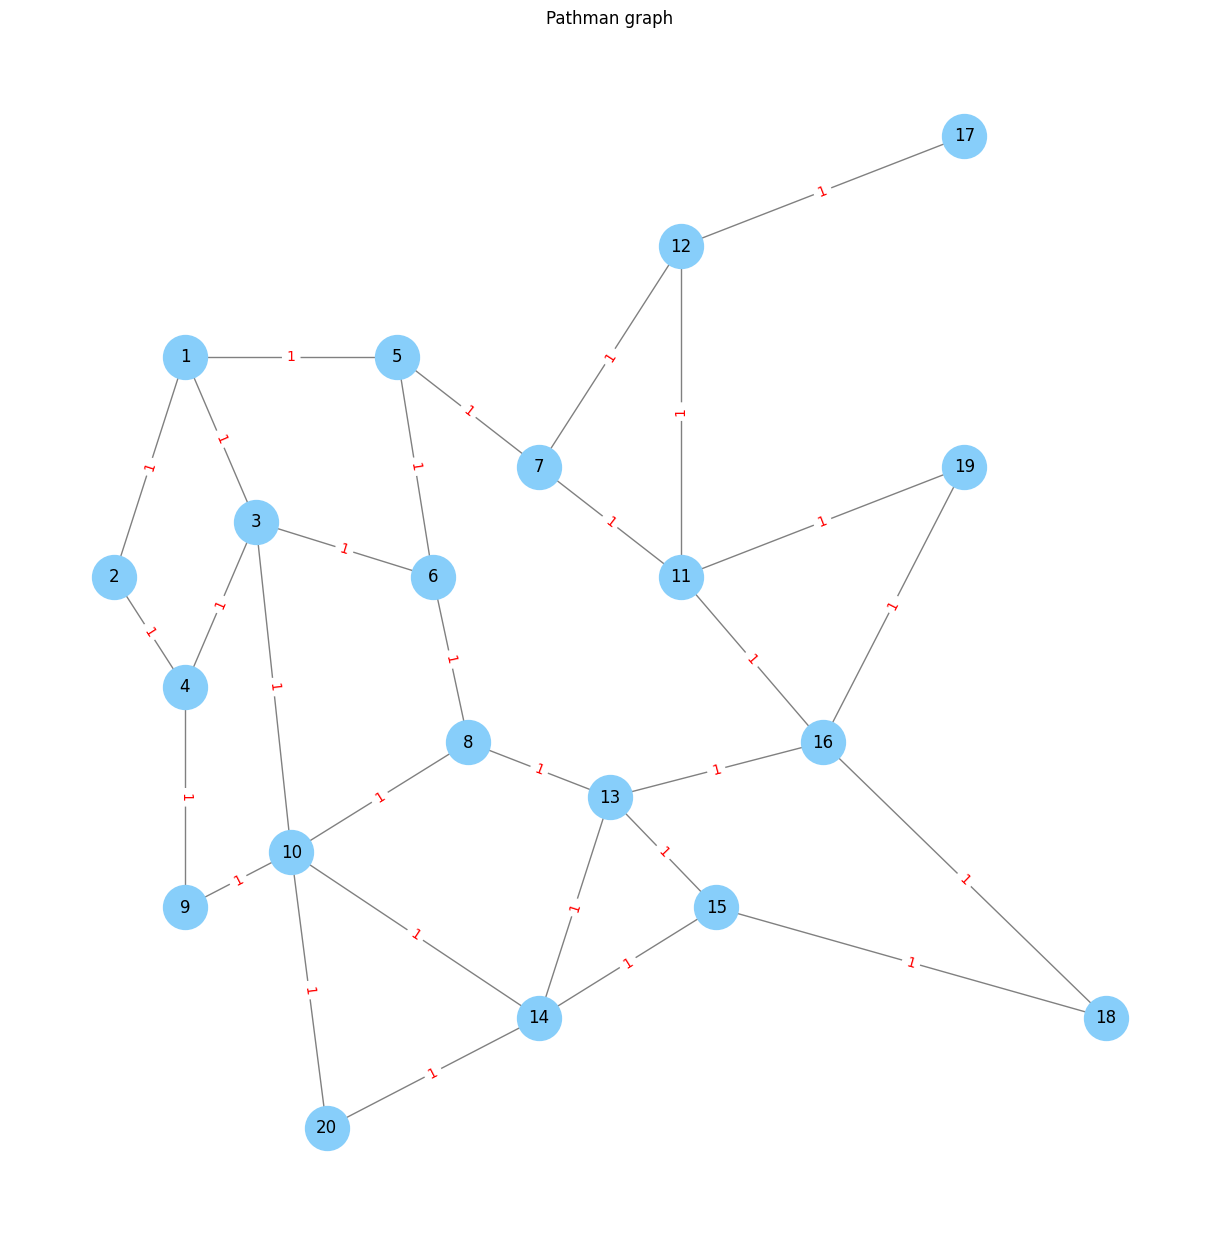

In [3]:
# Create Graph
graph = nx.Graph()

# Define edges with weights
edges = [
    ('1', '2', 1), ('1', '3', 1), ('1', '5', 1),
    ('2', '4', 1), 
    ('3', '4', 1), ('3', '10', 1), ('3', '6', 1),
    ('4', '9', 1),
    ('5', '6', 1), ('5', '7', 1),
    ('6', '8', 1), 
    ('7', '11', 1), ('7', '12', 1),
    ('8', '10', 1), ('8', '13', 1),
    ('9', '10', 1),
    ('10', '20', 1), ('10', '14', 1),
    ('11', '16', 1), ('11', '16', 1), ('11', '19', 1), 
    ('12', '11', 1), ('12', '17', 1),
    ('13', '14', 1), ('13', '15', 1), ('13', '16', 1),
    ('14', '15', 1), ('14', '20', 1),  
    ('15', '18', 1), 
    ('16', '18', 1), ('16', '19', 1),
        
]

# Add edges with weights
graph.add_weighted_edges_from(edges)

# Define node positions for Euclidean heuristic
positions = {
    '1': (1.5, 10), '2': (1, 8), '3': (2, 8.5), '4': (1.5, 7), '5': (3, 10), '6': (3.25, 8), '7': (4, 9),
    '8': (3.5, 6.5), '9': (1.5, 5), '10': (2.25, 5.5), '11': (5, 8), '12': (5, 11), '13': (4.5, 6), '14': (4, 4),
    '15': (5.25, 5), '16': (6, 6.5), '17': (7, 12), '18': (8, 4), '19': (7, 9), '20': (2.5, 3),
}

nx.set_node_attributes(graph, positions, "position")

# Draw graph
plt.figure(figsize=(12, 12))
pos = positions  # Use predefined positions for nodes
nx.draw(graph, pos, with_labels=True, node_color="lightskyblue", edge_color="gray", node_size=1000, font_size=12)
edge_labels = nx.get_edge_attributes(graph, "weight")
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=10, font_color="red")
plt.title("Pathman graph")
plt.show()

In [4]:
# set game rules and necessary parameters
game_stops_at = 5 # stopping condition --> after goal is reached that amount of time
 
goal_node = '1' # set starting node as 1, updates in loop when goal is reached
counter = 0 

while counter < game_stops_at:
    start_node = goal_node 
    goal_node = str(randint(5,20)) # randomly assign goal node --> convert to string to work with algo
    print(f"The goal is now: {goal_node}")
    
    # call astar algo
    path = astar(graph, start_node, goal_node)

    print("Shortest Path to goal node Found:", path)
    
    counter += 1 # update counter

The goal is now: 17
Shortest Path to goal node Found: ['1', '5', '7', '12', '17']
The goal is now: 8
Shortest Path to goal node Found: ['17', '12', '11', '19', '16', '18', '15', '14', '20', '10', '9', '4', '3', '6', '8']
The goal is now: 13
Shortest Path to goal node Found: ['8', '13']
The goal is now: 10
Shortest Path to goal node Found: ['13', '16', '19', '11', '12', '17', '7', '5', '6', '8', '10']
The goal is now: 17
Shortest Path to goal node Found: ['10', '14', '20', '15', '18', '16', '19', '11', '12', '17']
